In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

sns.set(style="whitegrid", palette="deep")

# Cargar data set
data = pd.read_csv("../data/raw/avocado.csv")

print("Dimensiones del dataset:", data.shape)
data.head()

Dimensiones del dataset: (18249, 14)


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [17]:
# Verificación de valores nulos
data.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

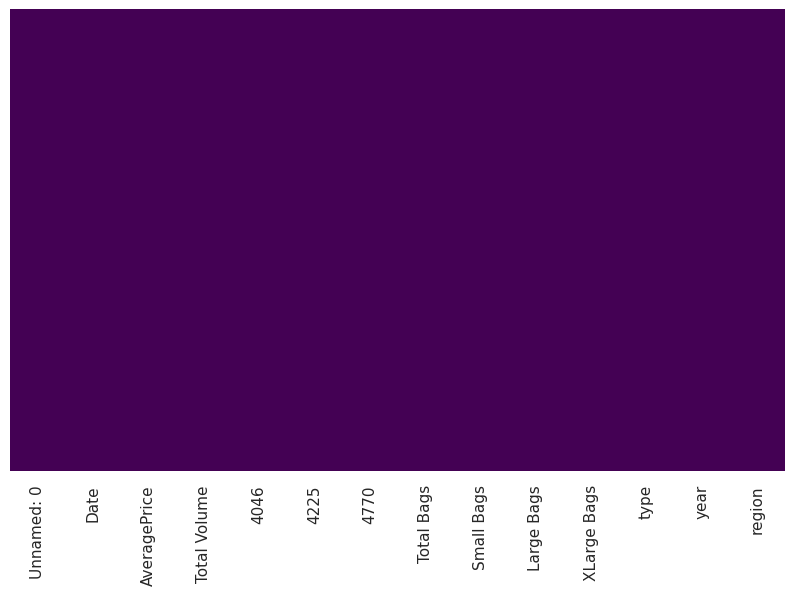

In [18]:
# Visualización de valores nulos
plt.figure(figsize=(10,6))
sns.heatmap(data.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.show()

In [19]:
# Transformación de la columna 'Date' a formato datetime
data['Date'] = pd.to_datetime(data['Date'])

data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month
data['day'] = data['Date'].dt.day
data['day_of_week'] = data['Date'].dt.dayofweek

# Eliminación de la columna 'Date'
data.drop(columns=['Date'], inplace=True)

In [20]:
# Detección y eliminación de outliers

numeric_cols = data.select_dtypes(include=[np.number]).columns

def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

data_clean = remove_outliers_iqr(data, numeric_cols)
print("Dimensiones después de eliminar outliers:", data_clean.shape)

Dimensiones después de eliminar outliers: (6725, 16)


In [21]:
# Conversión de variables categóricas en variables dummy
categorial_cols = data_clean.select_dtypes(include=['object']).columns
print("\n Variables categóricas:", list(categorial_cols))

data_dummies = pd.get_dummies(data_clean, columns=categorial_cols, drop_first=True)
print("Dimensiones después de crear dummies:", data_dummies.shape)


 Variables categóricas: ['type', 'region']
Dimensiones después de crear dummies: (6725, 66)


In [ ]:
# Normalización de variables numéricas
scaler = MinMaxScaler()

num_cols = data_dummies.select_dtypes(include=[np.number]).columns
data_dummies[num_cols] = scaler.fit_transform(data_dummies[num_cols])

print("\nDatos normalizados")
display(data_dummies.head())


Datos normalizados


,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,...,region_Seattle,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_West,region_WestTexNewMexico
0,0.000000,0.344633,0.327394,0.007284,0.389698,0.042863,0.313010,0.356248,0.017721,0.0,...,False,False,False,False,False,False,False,False,False,False
1,0.019231,0.355932,0.279628,0.004737,0.319451,0.051914,0.342115,0.389557,0.018526,0.0,...,False,False,False,False,False,False,False,False,False,False
2,0.038462,0.118644,0.602895,0.005583,0.781114,0.116147,0.293160,0.333001,0.019600,0.0,...,False,False,False,False,False,False,False,False,False,False
3,0.057692,0.203390,0.402698,0.007953,0.515089,0.064597,0.209150,0.235082,0.025419,0.0,...,False,False,False,False,False,False,False,False,False,False
4,0.076923,0.316384,0.260045,0.006615,0.313723,0.067445,0.222567,0.247871,0.037568,0.0,...,False,False,False,False,False,False,False,False,False,False


In [24]:
# Dataset resultante
data_dummies.to_csv("../data/processed/avocado_cleaned_normalized.csv", index=False)

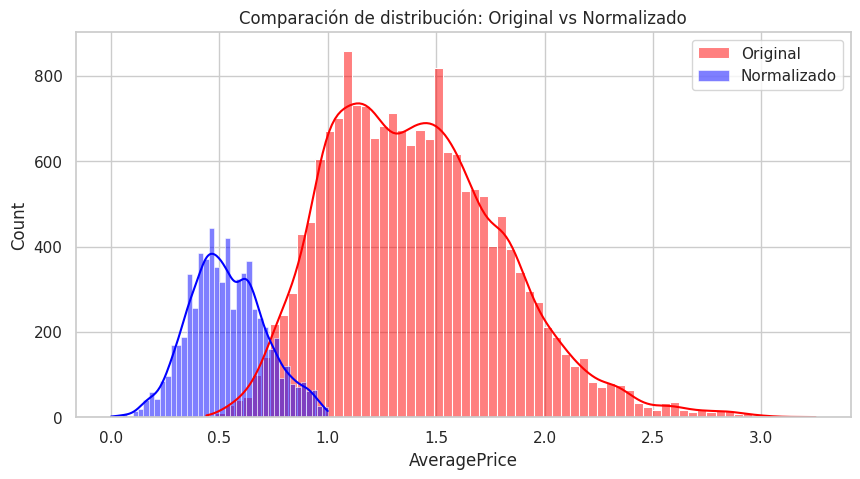

In [25]:
# Visualización de verificación
plt.figure(figsize=(10, 5))
sns.histplot(data['AveragePrice'], kde=True, color="red", label="Original")
sns.histplot(data_dummies['AveragePrice'], kde=True, color="blue", label="Normalizado")
plt.legend()
plt.title("Comparación de distribución: Original vs Normalizado")
plt.show()
